In [1]:
import os
os.chdir('../../')

In [2]:
import DeepPurpose.oneliner as oneliner
from DeepPurpose import dataset

RDKit WARNING: [09:25:24] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
target, target_name = dataset.load_SARS_CoV_Protease_3CL()
train_drug, train_target, train_y = dataset.load_AID1706_SARS_CoV_3CL('./data', seed = 1234)
X_repurpose, drug_names, drug_CID = dataset.load_antiviral_drugs('./data')

Beginning Processing...


/home/kh278/.conda/envs/DeepPurpose/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kh278/DeepPurpose/dataset.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['binary_label'][(val.PUBCHEM_ACTIVITY_SCORE >= threshold) & (val.PUBCHEM_ACTIVITY_SCORE <=100)] = 1


Default binary threshold for the binding affinity scores is 15, recommended by the investigator
Done!


In [4]:
len(train_drug)

26640

In [5]:
target

'SGFKKLVSPSSAVEKCIVSVSYRGNNLNGLWLGDSIYCPRHVLGKFSGDQWGDVLNLANNHEFEVVTQNGVTLNVVSRRLKGAVLILQTAVANAETPKYKFVKANCGDSFTIACSYGGTVIGLYPVTMRSNGTIRASFLAGACGSVGFNIEKGVVNFFYMHHLELPNALHTGTDLMGEFYGGYVDEEVAQRVPPDNLVTNNIVAWLYAAIISVKESSFSQPKWLESTTVSIEDYNRWASDNGFTPFSTSTAITKLSAITGVDVCKLLRTIMVKSAQWGSDPILGQYNFEDELTPESVFNQVGGVRLQ'

In [6]:
len(X_repurpose)

82

Loading customized repurposing dataset...
Beginning Downloading Configs Files for training from scratch...
Configs Models Successfully Downloaded...
Training on your own customized data...
in total: 26640 drug-target pairs
encoding drug...
unique drugs: 13763
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.
Training from scrtach...
Begin to train model 0 with drug encoding MPNN and target encoding CNN
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69219315. Total time 0.0005555555555555556 hours
Training at Epoch 1 iteration 100 with loss 0.64504254. Total time 0.014444444444444444 hours
Validation at Epoch 1 , AUROC: 0.7096436744033998 , AUPRC: 0.08351174696121282 , F1: 0.09165687426556991
Training at Epoch 2 iteration 0 with loss 0.6419151. Total time 0.024722222222222222 hours
Training at Epoch 2 iteration 100 with loss 0.55864704. Total time 

Validation at Epoch 1 , AUROC: 0.7057535142203334 , AUPRC: 0.21219667619756907 , F1: 0.3125
Training at Epoch 2 iteration 0 with loss 0.005714614. Total time 0.013055555555555556 hours
Training at Epoch 2 iteration 100 with loss 0.0060195783. Total time 0.02 hours
Validation at Epoch 2 , AUROC: 0.7370382477933966 , AUPRC: 0.2797849997227358 , F1: 0.26666666666666666
Training at Epoch 3 iteration 0 with loss 0.00014470259. Total time 0.025833333333333333 hours
Training at Epoch 3 iteration 100 with loss 0.0049518733. Total time 0.03277777777777778 hours
Validation at Epoch 3 , AUROC: 0.6987087283425956 , AUPRC: 0.1602019396477951 , F1: 0.21333333333333332
Training at Epoch 4 iteration 0 with loss 0.12378971. Total time 0.03861111111111111 hours
Training at Epoch 4 iteration 100 with loss 0.000104556784. Total time 0.04583333333333333 hours
Validation at Epoch 4 , AUROC: 0.7347826086956523 , AUPRC: 0.1956798393860122 , F1: 0.2
Training at Epoch 5 iteration 0 with loss 0.00012395252. Tota

Validation at Epoch 2 , AUROC: 0.7294377247466493 , AUPRC: 0.24917734080459128 , F1: 0.2696629213483146
Training at Epoch 3 iteration 0 with loss 0.011840247. Total time 0.009166666666666667 hours
Training at Epoch 3 iteration 100 with loss 0.04135609. Total time 0.011666666666666667 hours
Validation at Epoch 3 , AUROC: 0.7330336711343577 , AUPRC: 0.2755203658389193 , F1: 0.31578947368421056
Training at Epoch 4 iteration 0 with loss 0.0059758094. Total time 0.01361111111111111 hours
Training at Epoch 4 iteration 100 with loss 0.09914412. Total time 0.01611111111111111 hours
Validation at Epoch 4 , AUROC: 0.6988885256619811 , AUPRC: 0.2582334970571152 , F1: 0.30769230769230765
Training at Epoch 5 iteration 0 with loss 0.0154882725. Total time 0.018055555555555554 hours
Training at Epoch 5 iteration 100 with loss 0.03572474. Total time 0.020555555555555556 hours
Validation at Epoch 5 , AUROC: 0.7271984308597581 , AUPRC: 0.22114433935600636 , F1: 0.22222222222222224
Training at Epoch 6 it

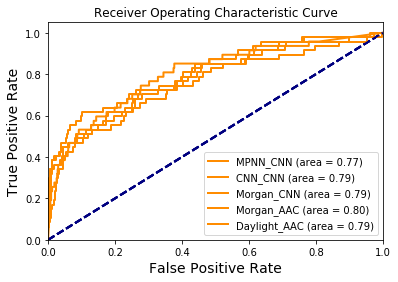

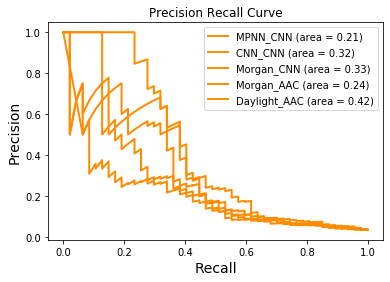

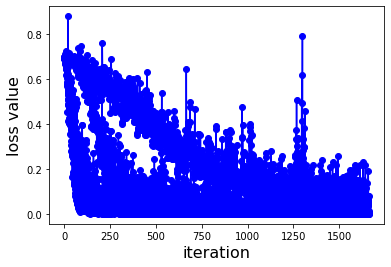

In [7]:
oneliner.repurpose(target = target, 
                    target_name = target_name, 
                    train_drug = train_drug,
                    train_target = train_target,
                    train_y = train_y,
                    X_repurpose = X_repurpose,
                    drug_names = drug_names,
                    save_dir = './save_folder',
                    finetune_batch_size = 128,
                    finetune_LR = 0.001,
                    finetune_epochs=10,
                    split='HTS',
                    convert_y = False,
                    frac=[0.8,0.1,0.1],
                    pretrained = False,
                    agg = 'max_effect')

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
model_names = [['MPNN', 'CNN'], ['CNN','CNN'], ['Morgan', 'CNN'], ['Morgan', 'AAC'], ['Daylight', 'AAC']]

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [36]:
logits = []
for i in model_names:
    logits.append(np.load('./result/' + i[0] + '_' + i[1] + '_logits.npy'))

In [16]:
ens_logits_mean = np.mean(logits, axis = 0)
ens_logits_max = np.max(logits, axis = 0)
ens_logits_mean_max = (np.mean(logits, axis = 0) + np.max(logits, axis = 0))/2

In [18]:
from DeepPurpose import utils
train, val, test = utils.data_process(train_drug, train_target, train_y, 
                                'CNN', 'CNN', 
                                split_method='HTS',frac=[0.8,0.1,0.1])

in total: 26640 drug-target pairs
encoding drug...
unique drugs: 13763
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.


In [20]:
y_label = test.Label.values

In [37]:
model_title = []
for i in model_names:
    model_title.append(i[0] + '+' + i[1])

#model_title.append('Ensemble_AVG')
#logits.append(ens_logits_mean)

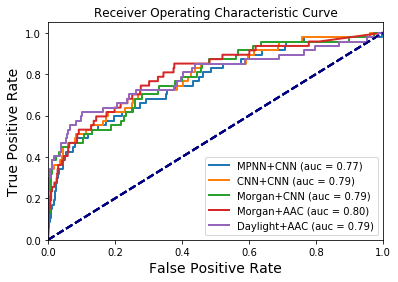

In [38]:
for idx, i in enumerate(model_title):
    y_label = np.array(y_label)
    y_pred = np.array(logits[idx])
    fpr = dict()
    tpr = dict() 
    roc_auc = dict()
    fpr[0], tpr[0], _ = roc_curve(y_label, y_pred)
    roc_auc[0] = auc(fpr[0], tpr[0])
    lw = 2
    plt.plot(fpr[0], tpr[0], lw=lw, label= i + ' (auc = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    fontsize = 14
    plt.xlabel('False Positive Rate', fontsize = fontsize)
    plt.ylabel('True Positive Rate', fontsize = fontsize)
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.savefig('roc_combined.pdf')

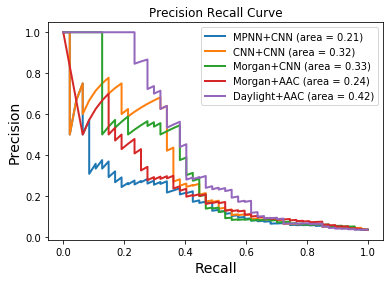

In [39]:
for idx, i in enumerate(model_title):
    y_label = np.array(y_label)
    y_pred = np.array(logits[idx])
    lr_precision, lr_recall, _ = precision_recall_curve(y_label, y_pred)    
    plt.plot(lr_recall, lr_precision, lw = 2, label= i + ' (area = %0.2f)' % average_precision_score(y_label, y_pred))
    fontsize = 14
    plt.xlabel('Recall', fontsize = fontsize)
    plt.ylabel('Precision', fontsize = fontsize)
    plt.title('Precision Recall Curve')
    plt.legend()
plt.savefig('prauc_combined.pdf')